In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the data

In [3]:
plt.style.use('ggplot')

df = pd.read_csv("../data_raw/benin-malanville.csv", parse_dates=["Timestamp"])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Data Summary & Missing Values

In [4]:
df.info()
df.describe()

missing = df.isna().sum()
missing_percent = (missing/len(df))*100
missing_percent.sort_values()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [5]:
print("An overview of the dataset: the first 5 rows")
df.head()

An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
print("An overview of the dataset: the last 5 rows")
df.tail()

An overview of the dataset: the last 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [7]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
493036,2022-07-17 09:17:00,346.1,11.4,336.5,295.5,295.9,24.9,85.3,3.2,4.1,0.7,279.7,8.0,997,0,0.0,37.3,33.9,NaN
103604,2021-10-19 22:45:00,-1.4,-0.3,-1.4,0.0,0.0,27.1,74.6,3.4,4.6,0.6,231.4,15.1,996,0,0.0,27.3,26.6,NaN
113419,2021-10-26 18:20:00,3.7,-0.5,3.2,6.0,6.0,32.0,65.8,1.0,1.6,0.6,194.9,6.6,993,0,0.0,31.7,31.1,NaN
457132,2022-06-22 10:53:00,860.0,744.8,201.5,756.6,753.7,31.1,63.3,3.9,4.9,0.5,163.3,9.2,995,0,0.0,60.3,49.0,NaN
105893,2021-10-21 12:54:00,919.0,665.6,291.8,949.0,941.0,37.2,47.0,2.9,3.9,0.5,131.8,6.4,994,0,0.0,67.7,58.3,NaN


In [8]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14 

In [9]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [10]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000   

In [12]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.20

# Outlier Detection (Z-Score)

In [17]:
columns_to_check = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

z = np.abs(stats.zscore(df[columns_to_check], nan_policy="omit"))
outlier_rows = np.where(z > 3)[0]
len(outlier_rows)


10526

# Clean Missing Values

In [18]:
df[columns_to_check] = df[columns_to_check].fillna(df[columns_to_check].median())
df_clean = df[(z < 3).all(axis=1)]
df_clean.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Export Cleaned Data

In [19]:
df_clean.to_csv("../data/benin_clean.csv", index=False)


# Univariate Analysis

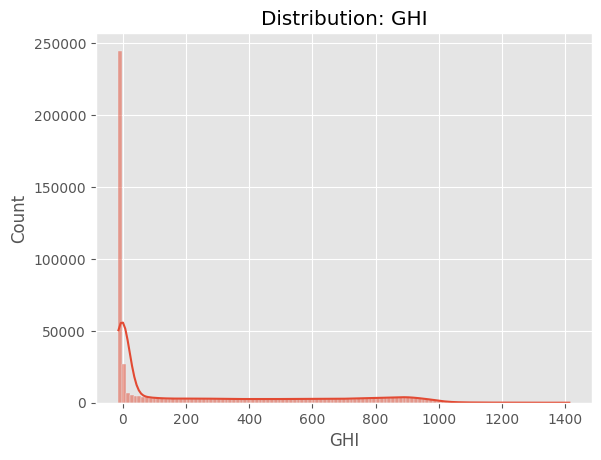

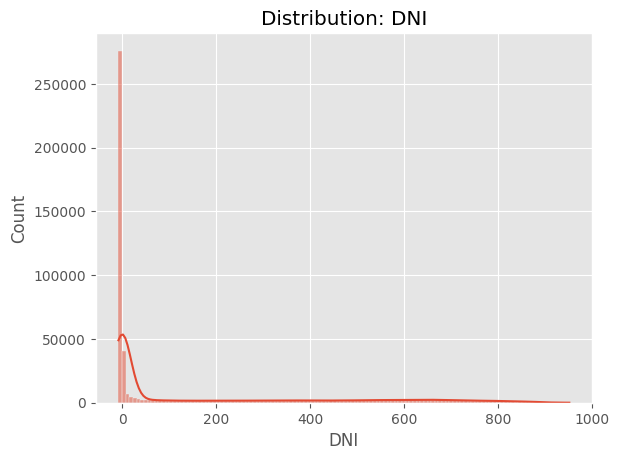

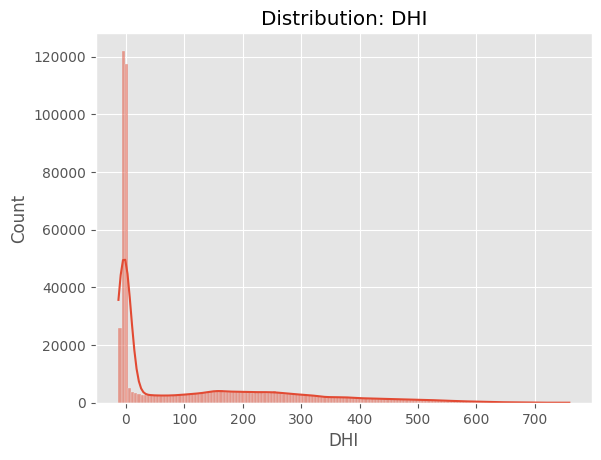

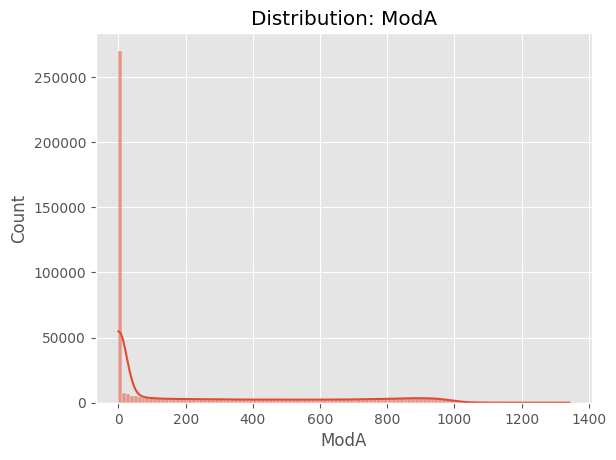

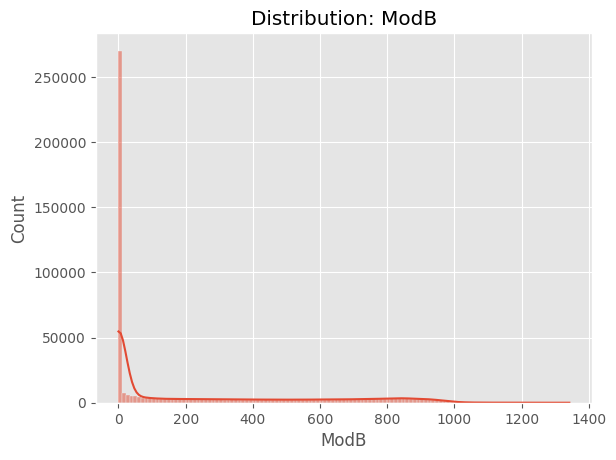

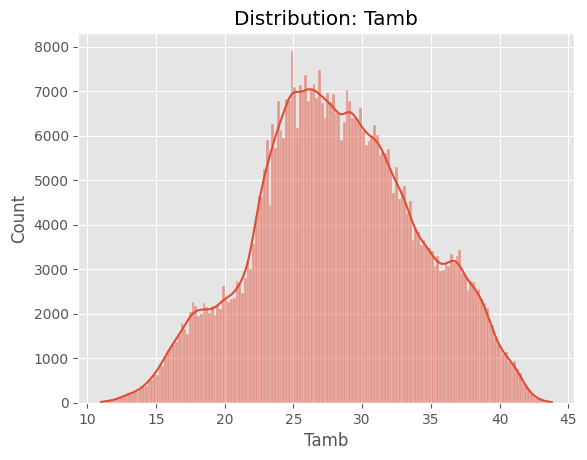

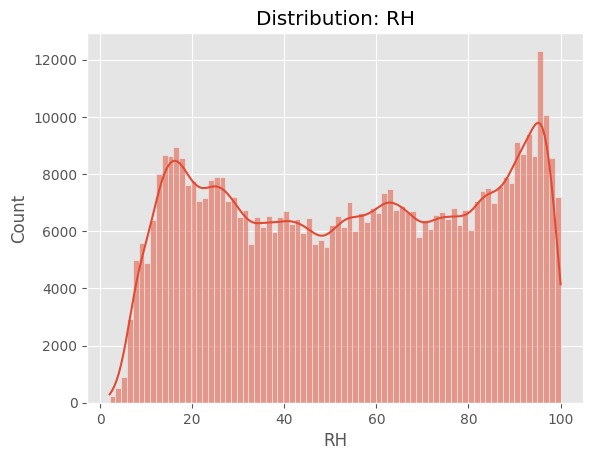

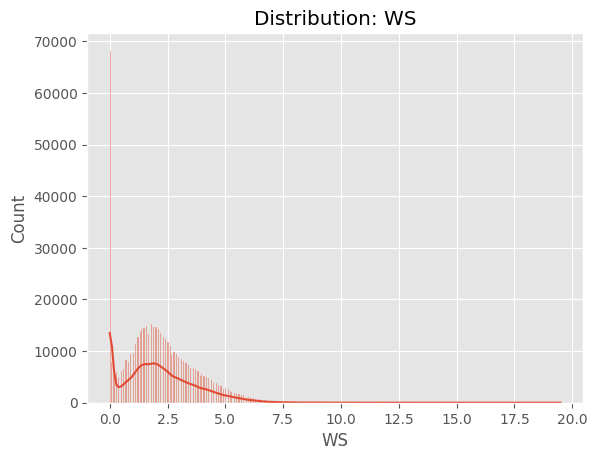

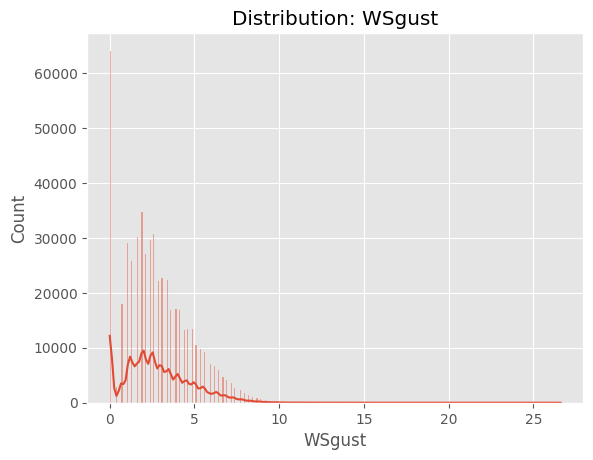

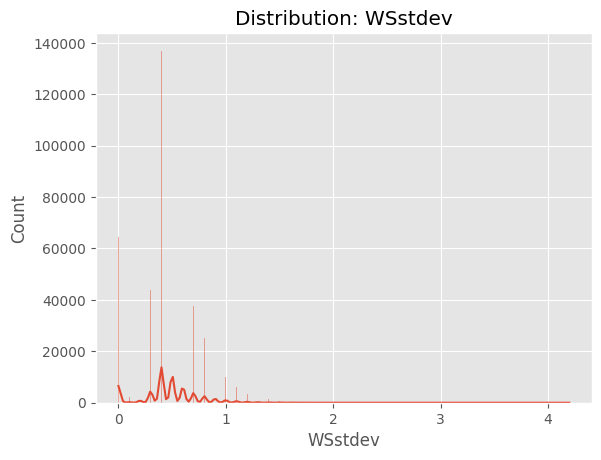

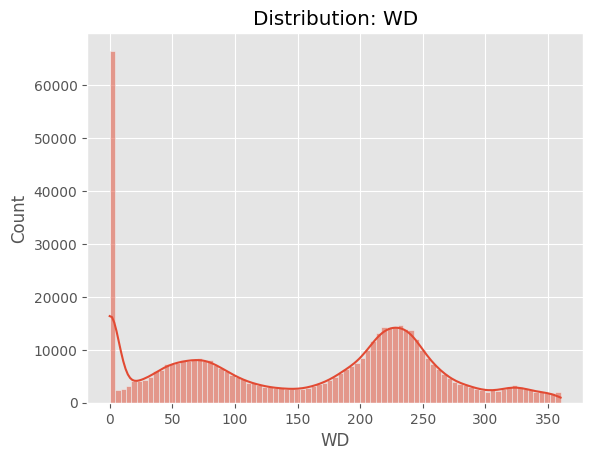

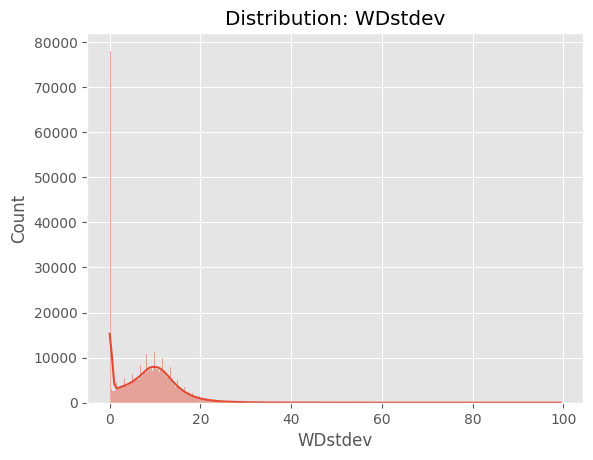

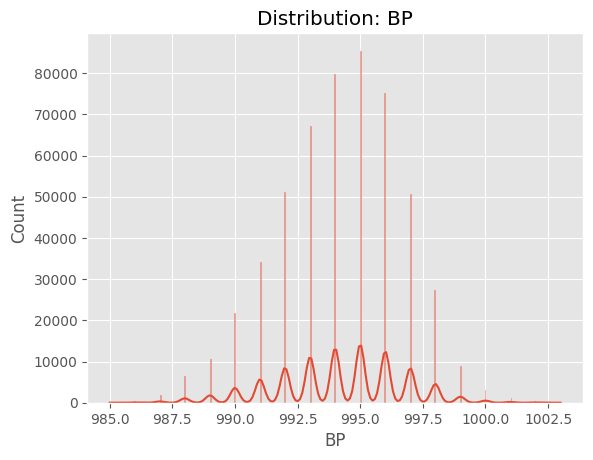

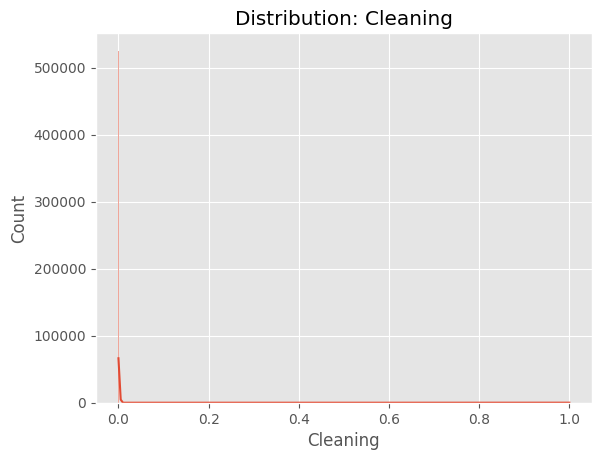

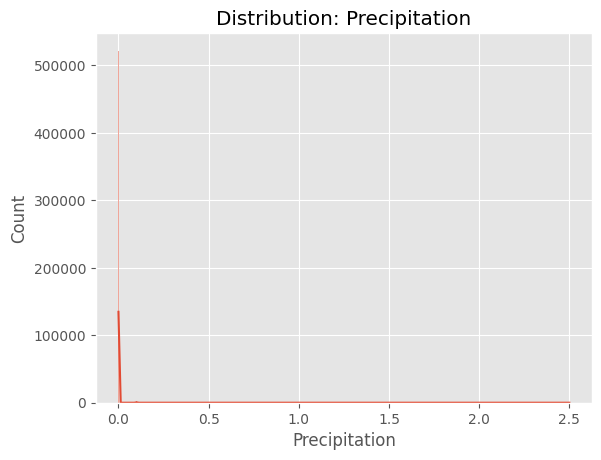

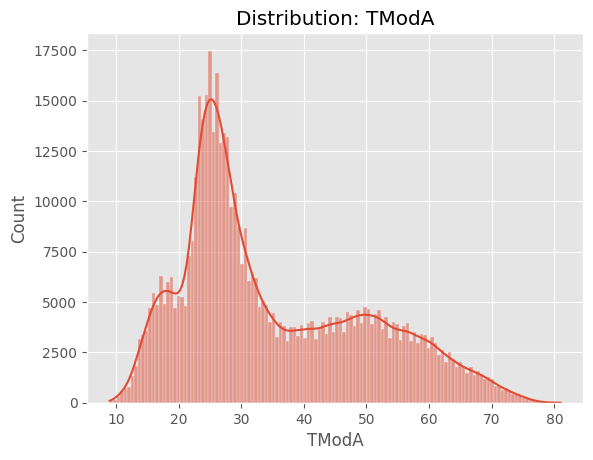

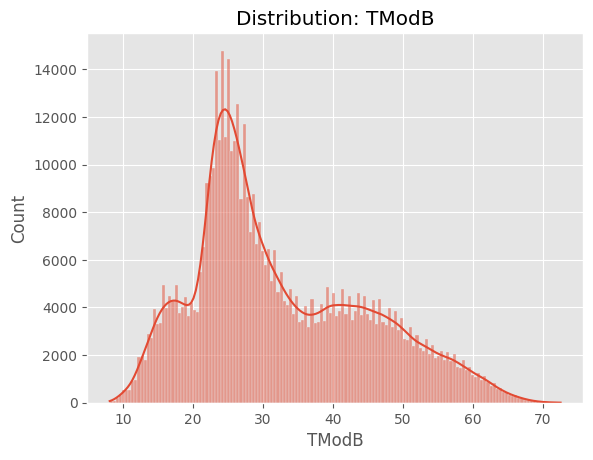

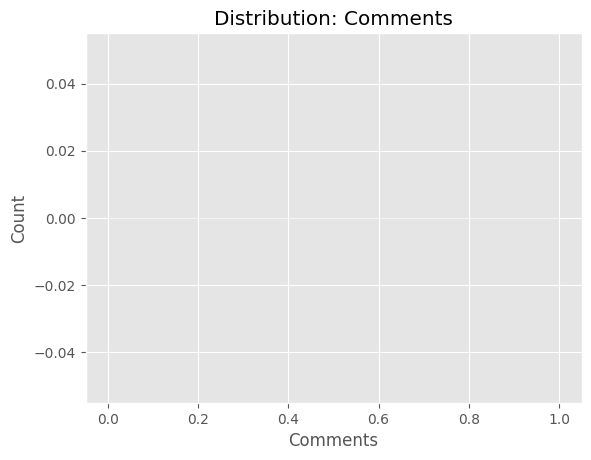

In [25]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


##  Univariate Analysis – Interpretation

### Solar Radiation Variables — GHI, DNI, DHI

- Most values are zero or near zero at night → 🕛 expected behavior

- Skewed heavily to the right → only peak around midday 🌞

- Peak daytime GHI approx. 600–1000 W/m² suggests good sunlight

- Interpretation example:

- Solar irradiance values are right-skewed because radiation exists only during daytime. Higher peaks indicate strong solar availability in Benin.

### Module Sensor Readings — ModA & ModB

- Similar distribution to GHI 

- If ModB < ModA often → soiling slowly reduces ModB performance

- Module readings show operational consistency but appear affected by soiling, visible as slightly lower values compared to irradiance.

### Ambient Temperature — Tamb

- Bell-shaped (normal-like) with peak around 25–35°C

- High daytime temperature conditions 🌡️ — typical for West Africa

- Higher module temperature may reduce solar panel efficiency.

### Relative Humidity — RH

- More spread → can be high in mornings/evenings

- Inverse relationship with temperature

- High humidity periods may reduce irradiance due to atmospheric scattering.

### Wind Speed — WS & WSgust

- Mostly low wind speed (0–5 m/s)

- Occasional gusts → outliers visible

- Low wind → Some heat retention on modules, contributing to higher temperatures.

### Barometric Pressure — BP

- Normally distributed → expected environmental stability

### Precipitation

- Mostly zero 

- Some small values → occasional rainfall

- Cleaning by natural rainfall is occasional — proper cleaning needed.

### 🔍 Summary

- Most meteorological and irradiance features show right-skewed distributions due to natural daily solar cycles. Temperature follows a more normal distribution indicating climate consistency in Benin. Wind, humidity, and precipitation distributions reveal the environmental conditions affecting solar panel performance.



## Correlation Matrix & Heatmap (numeric)

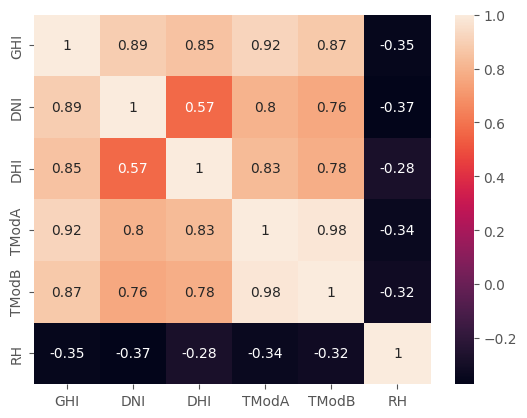

In [22]:
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','RH']].corr(), annot=True)
plt.show()


## Correlation Heatmap Insights

### Strong Positive Correlations
	
- GHI ↔ DNI	
High total irradiance occurs when sunlight is direct and skies are clear → stronger solar generation potential

- ModA & ModB ↔ GHI	
Both modules produce more power with higher sunlight levels → confirming good sensor and system response

- Tamb ↔ GHI	
Ambient temperature increases as sunlight intensity rises, especially during midday

### Operational Insight:

- Good irradiance conditions directly increase power generation, but also raise ambient temperature — which may reduce panel efficiency due to overheating.

### Negative Correlations

- RH ↔ Tamb	
As temperature rises, relative humidity drops → hot and dry midday conditions typical of Benin

- RH ↔ Irradiance (GHI/DNI)	
Strong sunlight rapidly dries the air → humidity lowest during maximum energy production periods

### Operational Insight:

- Low humidity supports better sunlight transmission, but combined with high heat may increase thermal losses in panels.

### Final Interpretation

The correlation patterns confirm that Benin has a strong solar resource, driven by high irradiance and clear-sky conditions. However, the combination of high temperatures and low cooling wind may negatively affect photovoltaic efficiency. This suggests that cooling strategies, ventilation, or panel material selection are important considerations for maximizing output in Benin’s climate.

# Box Plots (numeric)

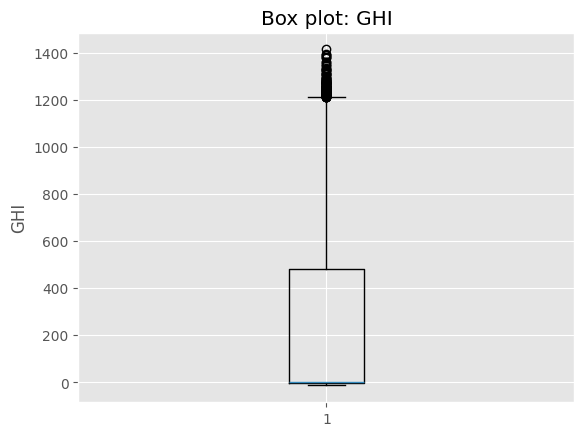

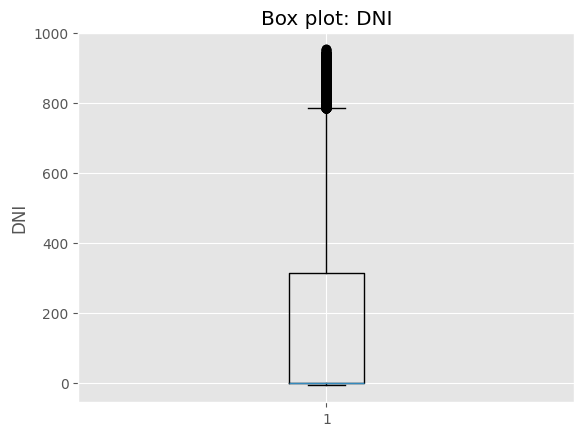

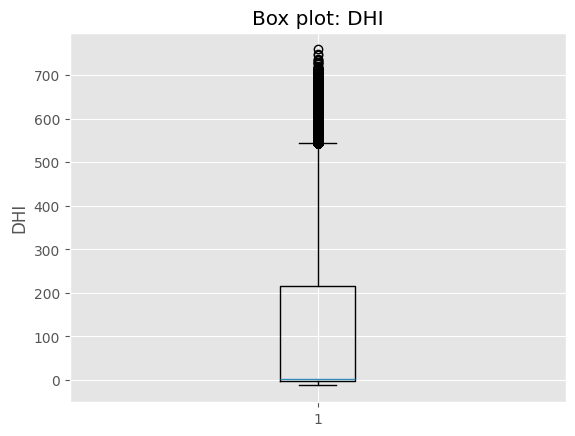

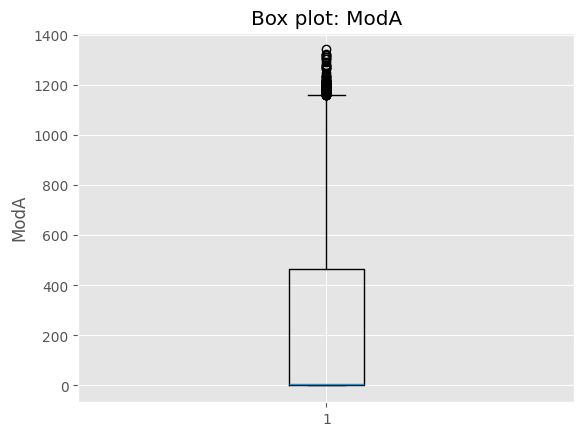

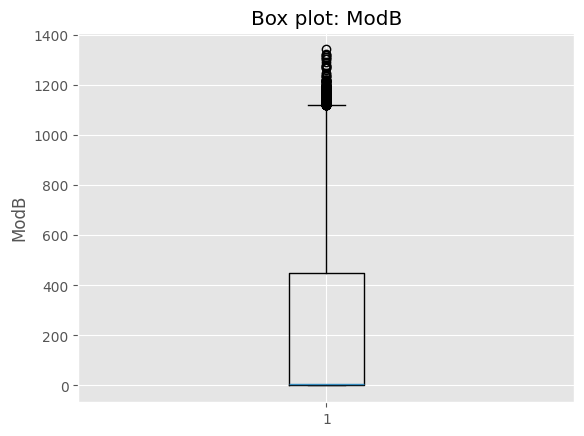

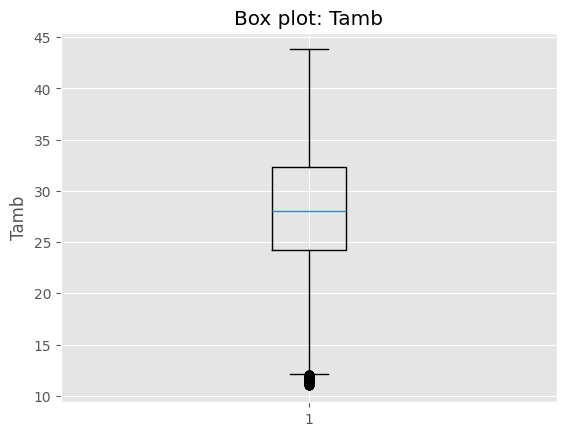

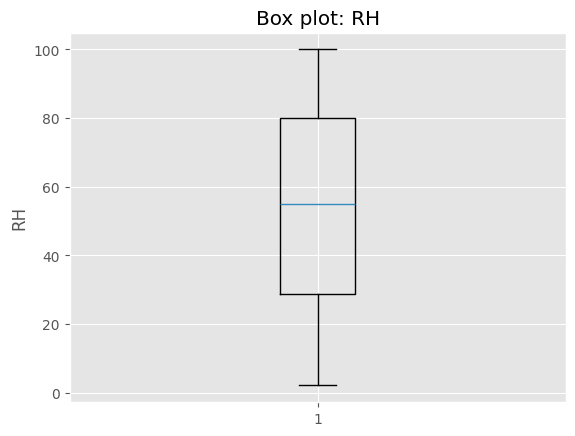

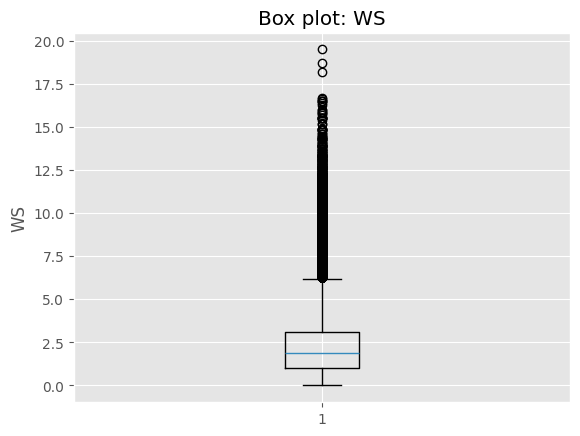

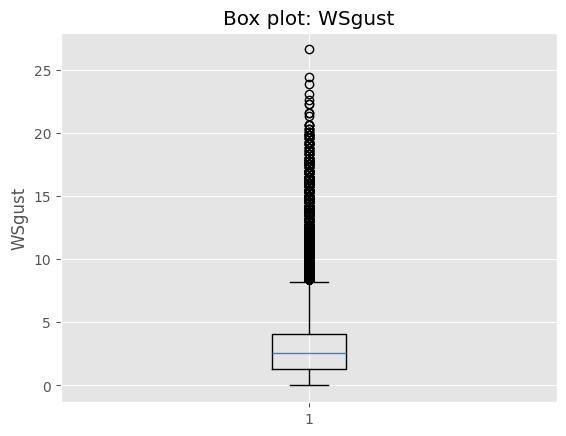

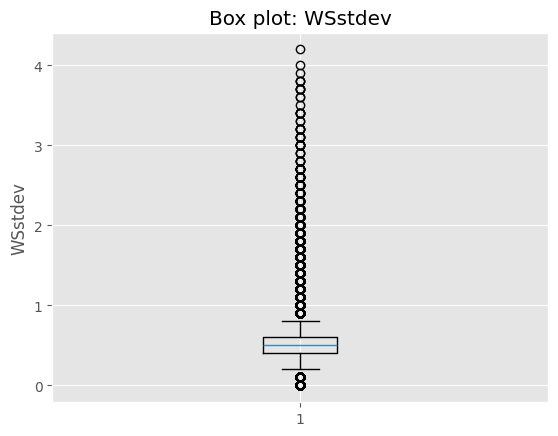

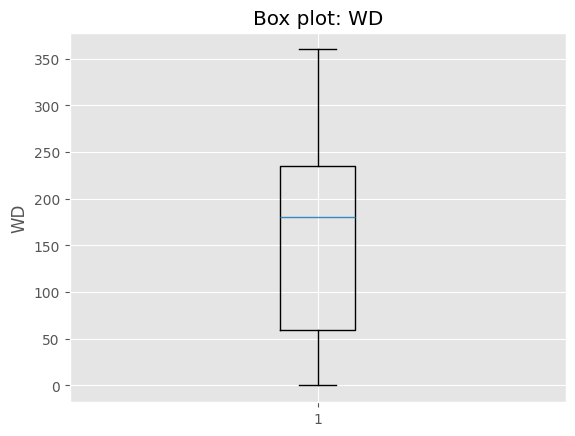

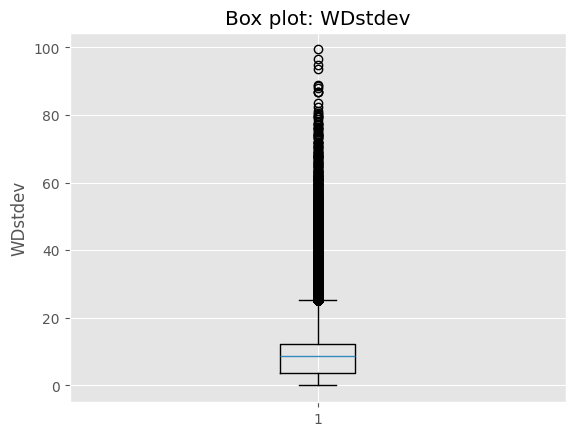

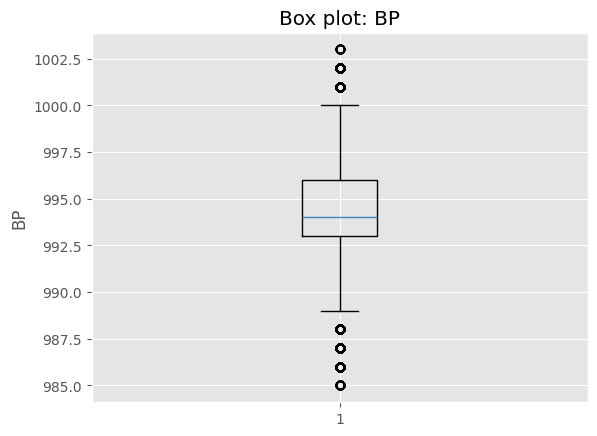

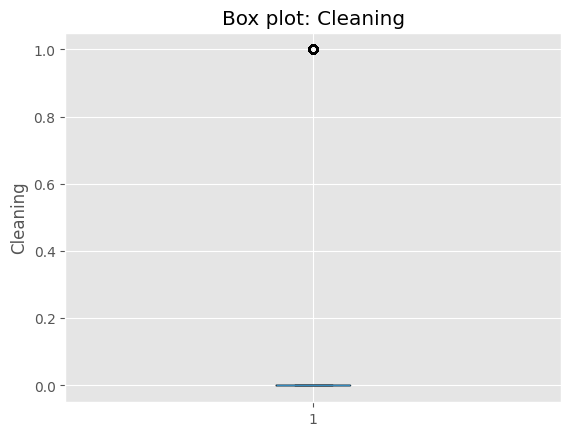

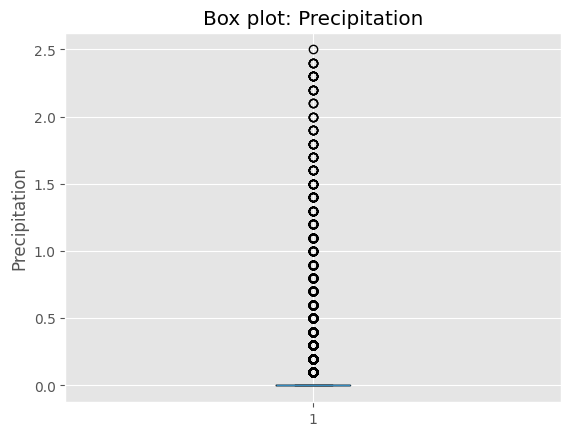

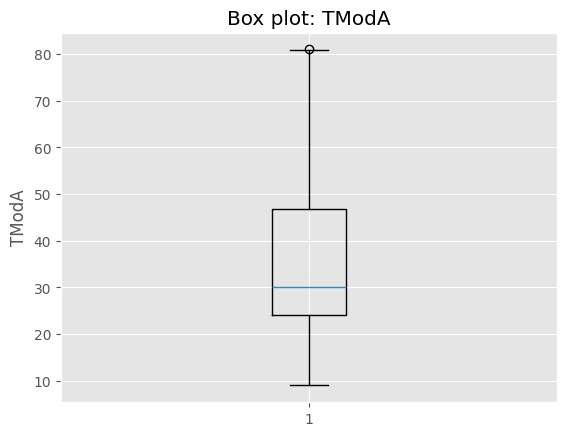

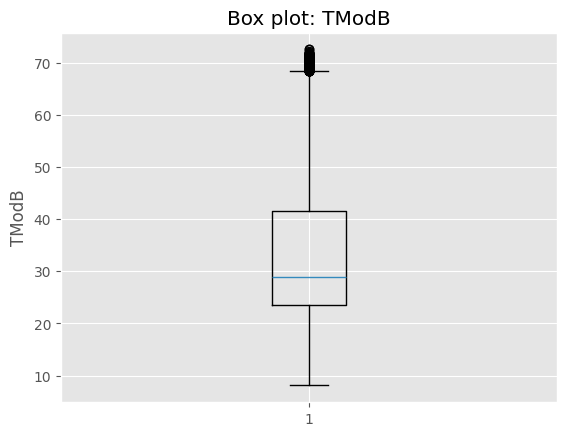

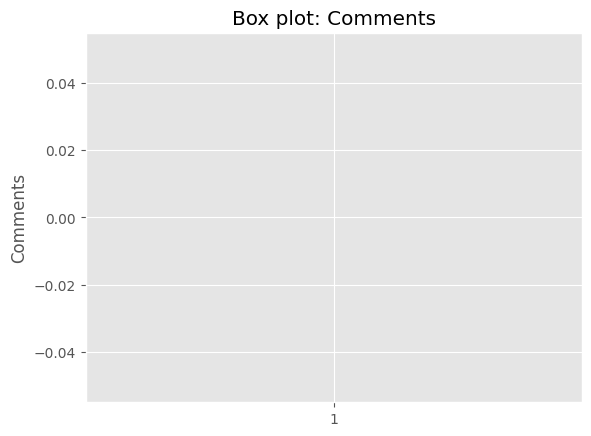

In [26]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()


##  Box Plot Analysis – Interpretation

### Solar Radiation Variables (GHI, DNI, DHI)

- Large concentration of values near zero → representing night-time when solar radiation is absent 

- Upper whiskers extend to high values → strong solar exposure during daytime 

- Presence of high-value outliers around noon hours → possible cloud effects or temporary irradiance spikes

   Interpretation:

- Solar irradiance distributions reveal a typical daily solar cycle with high variability during daylight. Outliers mostly reflect natural atmospheric changes and should not be removed blindly.

### Module Performance (ModA & ModB)

- Similar distribution to GHI but slightly lower median values

- More outliers in ModB → likely due to soiling effects or sensor drift

  Interpretation:

Module B appears more affected by soiling, showing reduced and inconsistent readings compared to Module A. Cleaning events likely restore performance.

### Ambient Temperature (Tamb)

- Higher median around 28–35°C

- Moderate number of upper outliers → extreme midday heat

   Interpretation:

- High panel temperatures in Benin could negatively impact photovoltaic efficiency, highlighting importance of cooling and airflow.

### Relative Humidity (RH)

- Wider box showing high variability

- Outliers mostly at very low humidity levels

   Interpretation:

- Humidity fluctuates significantly throughout the day; lower humidity generally coincides with hotter midday hours.

### Wind Speed (WS) & Wind Gust (WSgust)

- Majority of values clustered near 0–3 m/s

- Long upper whiskers with several outliers → momentary gust activity 🍃

  Interpretation:

- Benin is generally low-wind, possibly reducing natural cooling of panels, but occasional gusts help dissipate heat.

### Barometric Pressure (BP)

- Very few outliers

- Stable range → consistent weather patterns

  Interpretation:

- Atmospheric pressure is largely stable, supporting steady solar generation conditions.


## Bivariate Analysis
 Scatter Plots (selected pairs, colored by species)

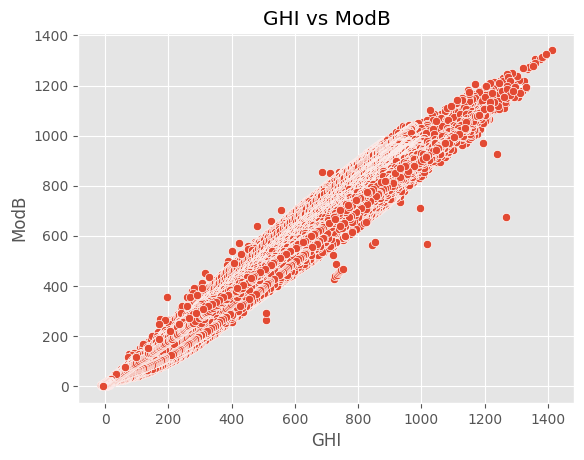

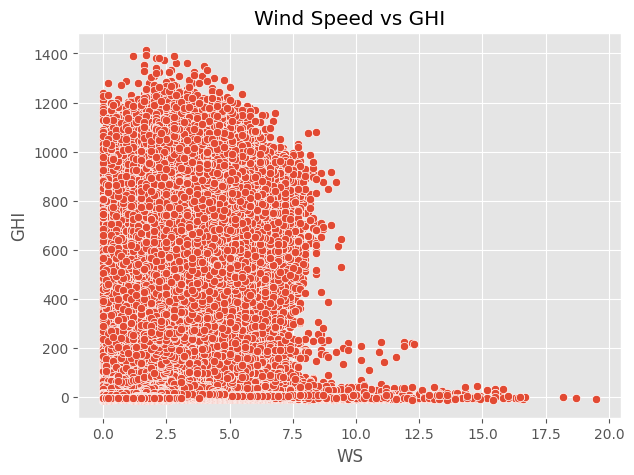

In [31]:

sns.scatterplot(data=df, x="GHI", y="ModB")
plt.title("GHI vs ModB")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="WS", y="GHI")
plt.title("Wind Speed vs GHI")
plt.show()

## Bivariate Analysis – Interpretation 
### Solar Radiation Relationship Insights (GHI vs DNI vs DHI)

- Strong positive relationship between GHI and DNI during clear sunlight conditions

- DHI increases when clouds scatter sunlight, causing drop in DNI

- Radiation metrics follow expected atmospheric behavior patterns

   Interpretation:

- Direct sunlight contributes most to total solar gain in Benin. Cloudy periods show reduced DNI but increased diffuse radiation (DHI).

### Temperature vs Solar Performance (GHI vs Tamb / RH)

- Scatter plots & trend lines show:

- Tamb increases as GHI increases → peak heat at midday 

- RH decreases as temperature and GHI increase

  Interpretation:

- Higher sunlight increases temperature, while humidity drops because heat evaporates moisture. High panel temperature can reduce solar module efficiency.

### Module Power Relationship (ModA & ModB vs GHI)

- Both ModA and ModB rise with increasing GHI

- ModA consistently performs slightly higher

- Performance gap widens under dusty/soiled conditions

  Interpretation:

- Sensor B (ModB) shows reduced output when soiled — confirming soiling reduces system efficiency. Cleaning cycles likely restore performance.

### Wind Influence (WS / WSgust vs GHI)

- Weak relationship between wind speed and irradiance

- Slight increase in wind around high-irradiance periods → daytime convection effect

- However, wind speeds are mostly low (< 3 m/s)

 Interpretation:

- Low wind limits natural cooling of modules, potentially increasing overheating losses in Benin.

### Summary

- high temperature and low cooling wind may reduce panel efficiency, while soiling causes measurable degradation in ModB sensor performance. Understanding these relationships supports optimal site design and maintenance planning.

## Multivariate Analysis
 Pairplot (quick overview)

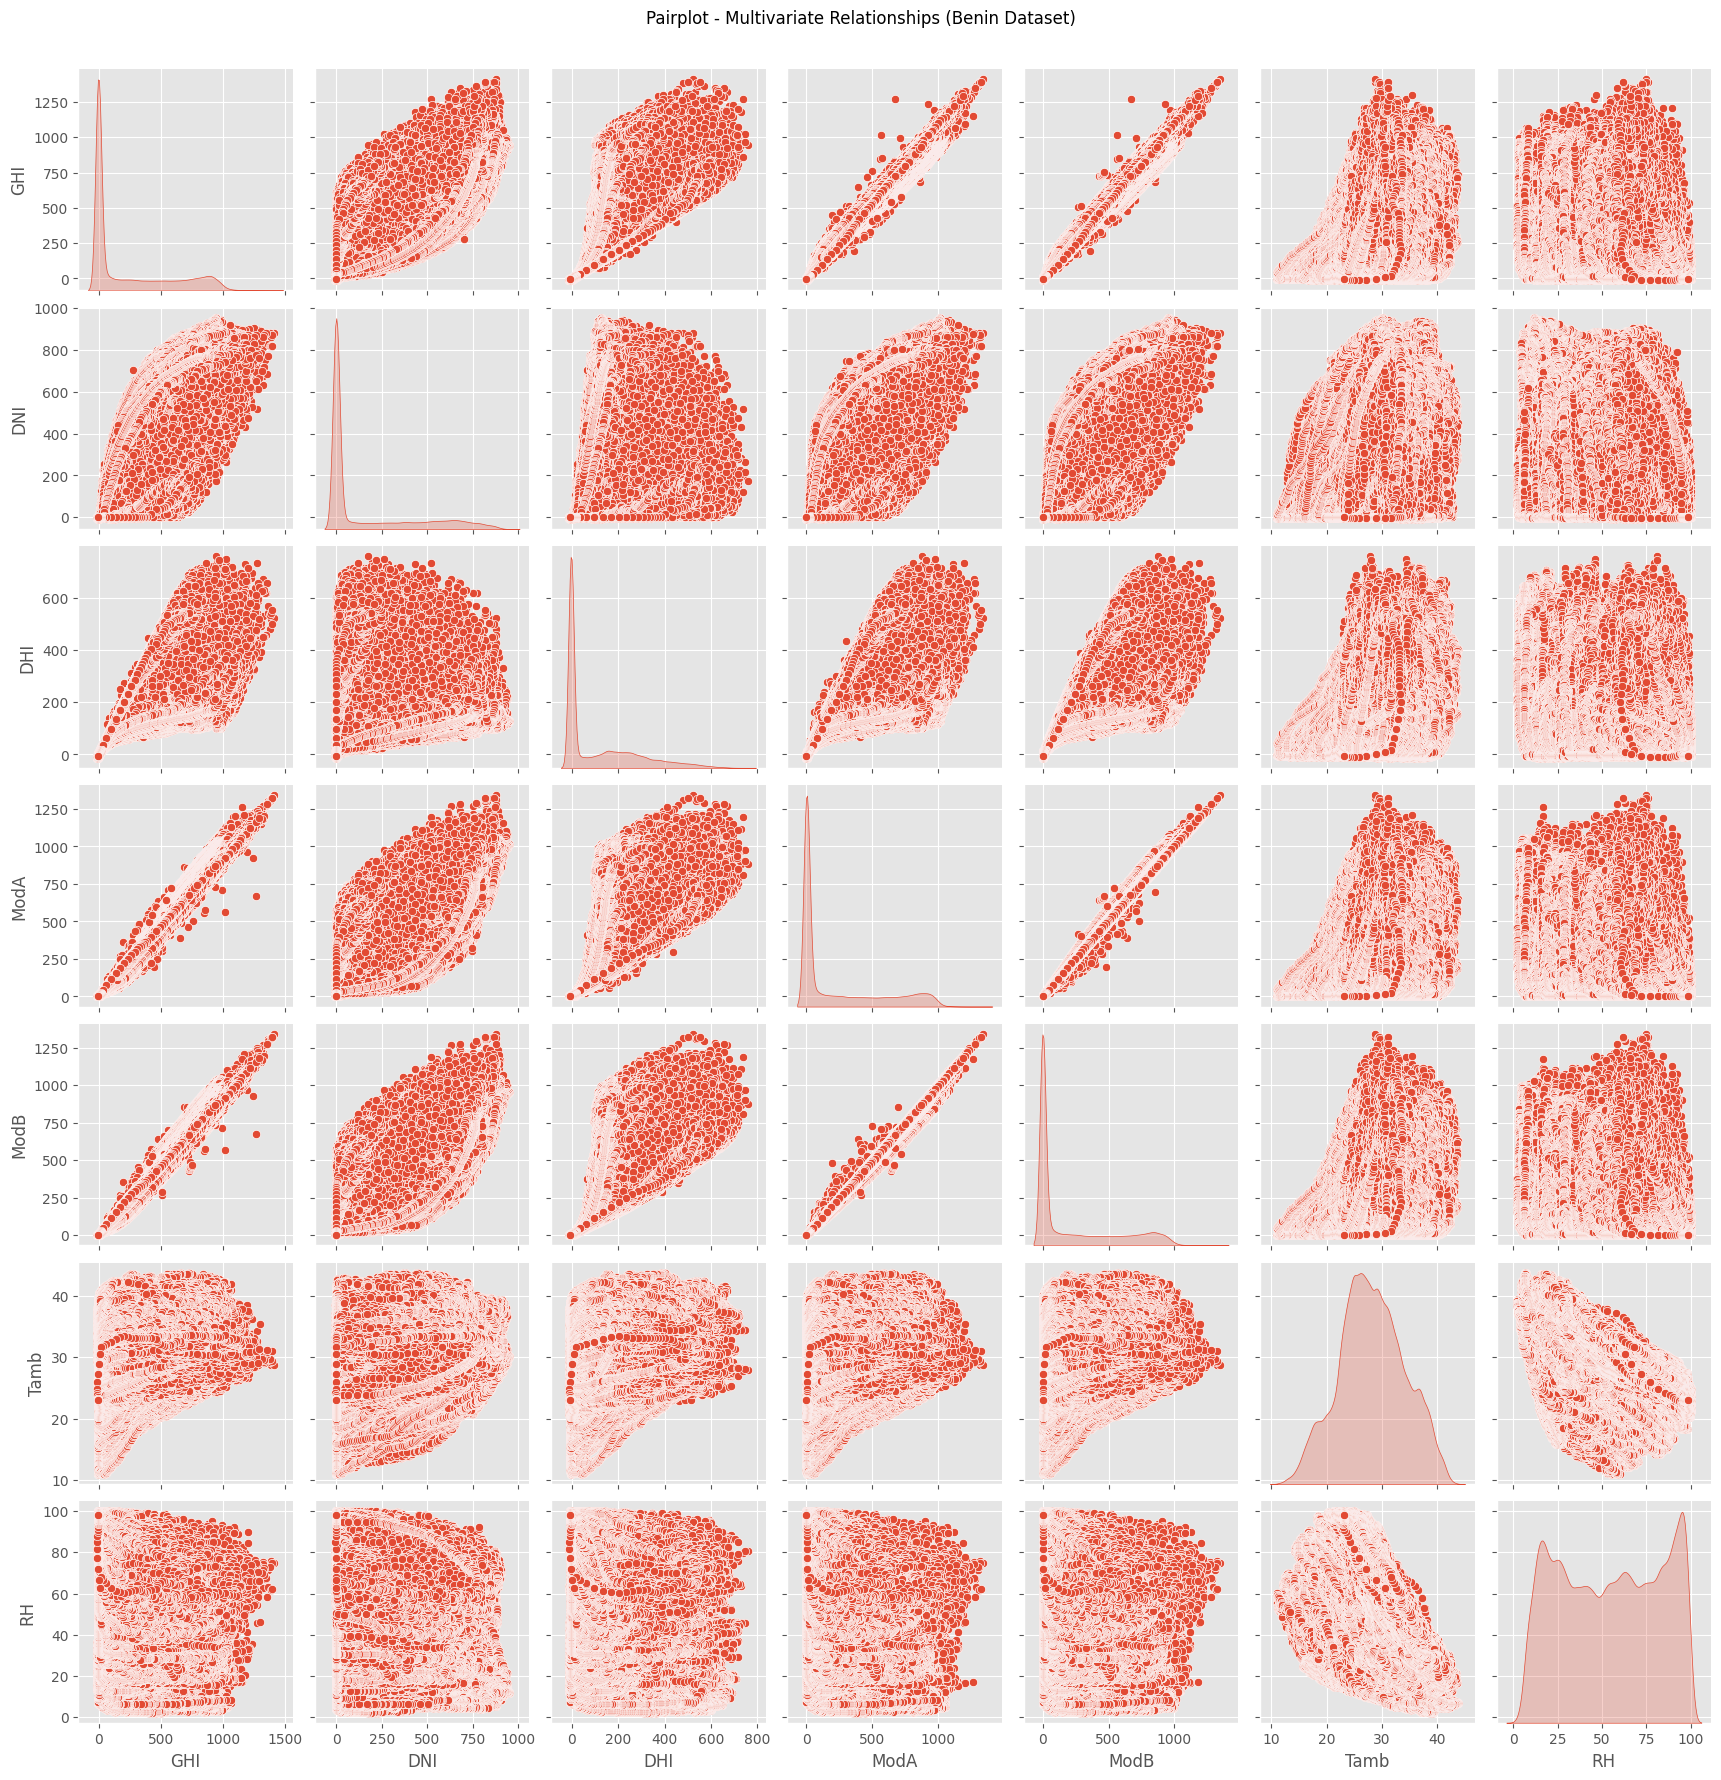

In [35]:
# Pairplot for core features
pairplot_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "Tamb", "RH"]

sns.pairplot(df[pairplot_cols], diag_kind="kde")
plt.suptitle("Pairplot - Multivariate Relationships (Benin Dataset)", y=1.02)
plt.show()


## Multivariate Analysis – Interpretation 

### Solar Irradiance vs Module Output

- Strong linear relationships between GHI, DNI, and both ModA & ModB

- This confirms that the modules respond directly and accurately to solar irradiance.

- ModA consistently performs slightly better than ModB → suggests soiling or sensor degradation on ModB.

  Insight:

- Regular cleaning is important to maintain performance and reduce soiling losses.
###  Temperature Effects

- Tamb increases as solar irradiance increases

- Module temperatures (TModA & TModB, if included) follow the same behavior

 Insight:

- High heat during peak irradiance may reduce efficiency due to thermal stress on panels.

### Humidity Behavior

- RH decreases when irradiance and temperature rise

- A clear inverse relationship is present in multiple plots

 Insight:

- Dry and sunny conditions are best for solar production but may accelerate equipment wear and dust accumulation.

### Wind Impacts (from earlier bivariate analysis)

- Wind speed shows very weak relationships with irradiance

- Low wind conditions reduce natural cooling, increasing the effect of panel heating

 Insight:

- Proper spacing and airflow design are essential in Benin’s solar installations.

### Final Summary

Multivariate analysis reveals that Benin has strong solar energy generation potential with clear-sky conditions dominating the irradiance profile. However, high ambient temperatures and low wind speeds can negatively impact module performance by reducing cooling efficiency. Soiling also plays a role in reducing performance for certain sensors or modules.

# Cleaning Impact on Sensor Output

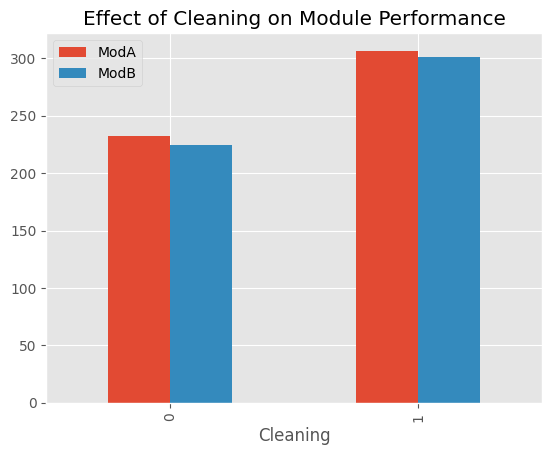

In [36]:
df_clean.groupby("Cleaning")[['ModA','ModB']].mean().plot(kind='bar')
plt.title("Effect of Cleaning on Module Performance")
plt.show()